# Control the page layout

```{warning}
Many of the features on this page are experimental and may change at any time.
```

There are a few ways to control the layout of a page with Jupyter Book. Many of these
ideas take inspiration from the [Edward Tufte layout CSS guide](https://edwardtufte.github.io/tufte-css/).

Let's begin with a sample plot. You can click the toggle button to the right
to see the code that generated it.

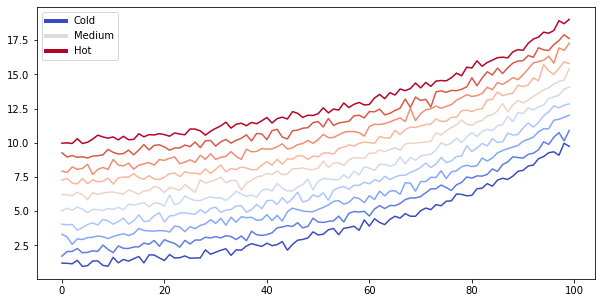

In [1]:
def make_fig(figsize):
    from matplotlib import rcParams, cycler
    import matplotlib.pyplot as plt
    import numpy as np
    plt.ion()

    # Fixing random state for reproducibility
    np.random.seed(19680801)

    N = 10
    data = [np.logspace(0, 1, 100) + .2 * np.random.randn(100) + ii for ii in range(N)]
    data = np.array(data).T
    cmap = plt.cm.coolwarm
    rcParams['axes.prop_cycle'] = cycler(color=cmap(np.linspace(0, 1, N)))


    from matplotlib.lines import Line2D
    custom_lines = [Line2D([0], [0], color=cmap(0.), lw=4),
                    Line2D([0], [0], color=cmap(.5), lw=4),
                    Line2D([0], [0], color=cmap(1.), lw=4)]

    fig, ax = plt.subplots(figsize=figsize)
    lines = ax.plot(data)
    ax.legend(custom_lines, ['Cold', 'Medium', 'Hot'])
make_fig(figsize=(10, 5))

(layout/sidebar)=
## Sidebar content

Adding sidebar elements allow you to provide contextual information that doesn't break
up the flow of your main content. It is one of the main patterns recommended in the
[Tufte style guide](https://edwardtufte.github.io/tufte-css/).

There are two kinds of sidebars supported by Jupyter Book. We'll
describe them below.

```{note}
Some sidebar content behaves differently depending on the screen size. If the screen is narrow
enough, the sidebar content will exist in-line with your content. Make the screen
wider and it'll pop out to the right.
```

### Sidebars within content


````{sidebar} Here is some sidebar content
It spans a bit of your main content, as well as the margin, as seen by the
note block below:
```{note}
Here's a note block within the sidebar!
```
````

If you use a sidebar within your content, the sidebar will stay in-line with your page's content. However, it will be
placed to the right, allowing your content to wrap around it. This prevents
the sidebar from breaking up the flow of your content. This is particularly
useful if you've got tall-and-long blocks of content or images that you would
like to provide context to throughout your content.

To add a sidebar to your content, use the following syntax:

````md
```{sidebar} My sidebar title
My sidebar content
```
````

### Margin content

To add content to the margin with MyST Markdown, use this syntax:

````md
```{margin} An optional title
My margin content
```
````

`````{margin} **For example**
Here's some margin content! It was created by using the
````
```{margin}
```
````
directive in a Markdown cell. Jupyter Book automatically converts these
cells into helpful margin content.
`````

Controlling margin content with code cells uses a slightly different syntax,
which we'll cover below.

### Margins with code cells

You can make a code cell move to the right margin by adding `margin` to your
cell's tags.

``````{tab-set}
`````{tab-item} Jupyter Notebook
Here's what the cell metadata for a margin cell looks like:
```json
{
    "tags": [
        "margin",
    ]
}
```
:::{seealso}
[](jupyter-cell-tags)
:::
`````

`````{tab-item} MyST Text File
For a MyST text file these tags can be added to the `code-cell`
````md
```{code-cell} <language>
:tags: [margin]
```
````
`````
``````

For example, we'll re-display the figure above, and add a `margin` tag to the code cell.

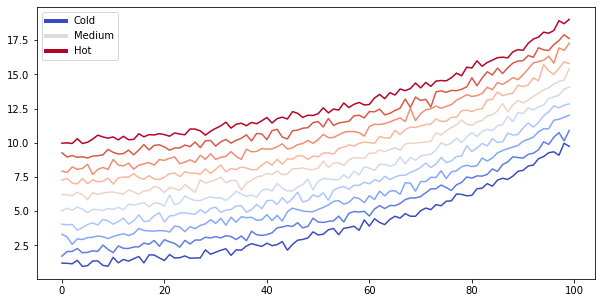

In [2]:
make_fig(figsize=(10, 5))

This can be combined with other tags like `remove-input` to **only display the figure**.

The [MyST cheat sheet](myst_cheatsheet) provides a [list of `code-cell` tags available](myst_cheatsheet:code-cell:tags)

## Full-width content

Sometimes, you'd like to use **all** of the horizontal space available to you.
This allows you to highlight particular ideas, visualizations, etc.

### Full-width code cells

You can specify that a code cell's inputs and/or outputs should take up all of the horizontal space (including the margin to the right) using the following cell metadata tag:

```json
{
    "tags": [
        "full-width",
    ]
}
```

```{seealso}
For tips on how to add cell metadata to your notebooks, see [](jupyter-cell-tags).
```

For example, let's take a look at the figure in the margin above in a cell with `full-width` set. We'll tell Matplotlib
to make it a bit wider so we can take advantage of the extra space!

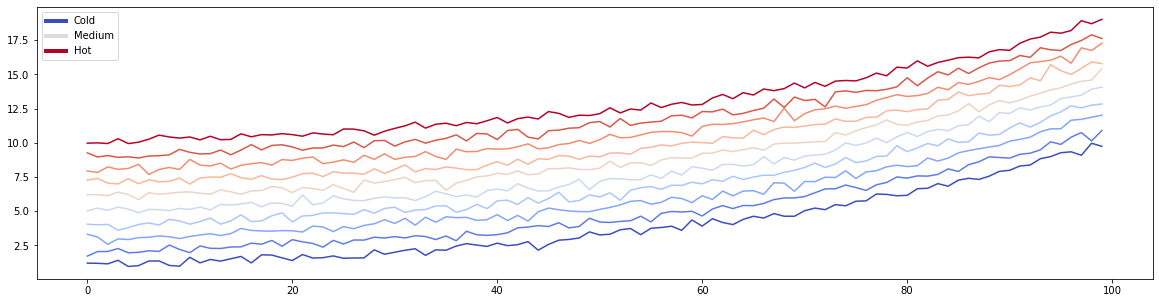

In [3]:
make_fig(figsize=(20, 5))

### Full-width markdown content

If you'd like to make your markdown content full-width, you cannot do so via cell tags.
Instead, you have a few options:

1. **Use the `{div}` directive with a `full-width` class.**. Any content with a `full-width` class will take up the full width of the screen. For example, the following code:

   `````
   ````{div} full-width
   ```{note}
   Here's a note that will take the full width
   ```
   ````
   `````

   results in:

   ````{div} full-width
   ```{note}
   Here's a note that will take the full width
   ```
   ````

   For more information on `<div>` blocks, see [](custom-div-blocks).
2. **Add a `full-width` class to directives that support classes**. Many directives allow you to directly add a CSS class to them.

   For example, the `{note}` directive above allows for this:

   ````
   ```{note}
   :class: full-width
   Here's a note that will take the full width
   ```
   ````

   results in:

   ```{note}
   :class: full-width
   Here's a note that will take the full width
   ```

   Check the documentation of the directive to see if it supports adding your own classes, or use the `{div}` directive as described above.

```{admonition} **Mixing margins and full-width content**
:class: warning, full-width

Be careful when mixing margins and full-width content.
Sometimes these can conflict with one another in visual space. You should use them relatively sparingly in order for them to have their full effect of highlighting information.
```